# Introduction to Principal Component Analysis

## Definition
Principal Component Analysis, or PCA for short, is a method for reducing the dimensionality of data. It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, whilst retaining the essence of the original data.

*Note:Reducing the number of components or features costs some accuracy and on the other hand, it makes the large data set simpler, easy to explore and visualize.*

## Algorithm
1. Standardize the data. (with mean =0 and variance = 1)
2. Generate the Covariance Matrix
3. Compute the Eigenvectors and Eigenvalues from the covariance matrix 
4. Sort eigenvalues in descending order and choose the top k Eigenvectors that correspond to the k largest eigenvalues (k will become the number of dimensions of the new feature subspace k≤d, d is the number of original dimensions).
5. Generate the projection matrix W from the selected k Eigenvectors
6. Fit and Transform the original data set X via W to obtain the new k-dimensional feature subspace Y

 ## Example Code
 The purpose of the case study is to classify a given silhouette as one of three different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers 
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why 
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)  



In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Import my own library
import mymodule as mm

In [3]:
# Read Vehicles Data
vehicles = pd.read_csv("vehicle.csv")
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

*The above info clearly shows that there are missing values for certain attributes (whichever has less than 846 non-null entries)*

In [4]:
vehicles.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
261,91,39.0,88.0,189.0,63.0,9,175.0,38.0,21.0,132,197.0,457.0,156.0,69.0,0.0,23.0,191.0,198,car
361,101,46.0,105.0,195.0,61.0,10,198.0,34.0,23.0,150,213.0,578.0,195.0,66.0,7.0,38.0,192.0,205,car
30,89,43.0,85.0,160.0,64.0,11,155.0,43.0,19.0,151,173.0,356.0,174.0,72.0,5.0,9.0,185.0,196,van
811,83,39.0,69.0,127.0,54.0,5,135.0,49.0,18.0,131,155.0,274.0,162.0,69.0,16.0,6.0,187.0,190,car
555,87,49.0,86.0,190.0,64.0,9,177.0,37.0,21.0,153,197.0,471.0,209.0,67.0,11.0,7.0,192.0,199,car


In [5]:
# Look into the Statistics
vehicles.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846.0,NaN,NaN,NaN,93.678487,8.234474,73.0,87.0,93.0,100.0,119.0
circularity,841.0,NaN,NaN,NaN,44.828775,6.152172,33.0,40.0,44.0,49.0,59.0
distance_circularity,842.0,NaN,NaN,NaN,82.110451,15.778292,40.0,70.0,80.0,98.0,112.0
radius_ratio,840.0,NaN,NaN,NaN,168.888095,33.520198,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,NaN,NaN,NaN,61.67891,7.891463,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,846.0,NaN,NaN,NaN,8.567376,4.601217,2.0,7.0,8.0,10.0,55.0
scatter_ratio,845.0,NaN,NaN,NaN,168.901775,33.214848,112.0,147.0,157.0,198.0,265.0
elongatedness,845.0,NaN,NaN,NaN,40.933728,7.816186,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,843.0,NaN,NaN,NaN,20.582444,2.592933,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,846.0,NaN,NaN,NaN,147.998818,14.515652,118.0,137.0,146.0,159.0,188.0


In [6]:
# Find Missing Values
missing_values=mm.find_missing_value_columns(vehicles)
vehicles[missing_values].isnull().sum()

Columns having missing Values:
Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')


circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [7]:
# Lets fill the missing values with the interpolate method
vehicles_new = vehicles.interpolate()
vehicles_new[missing_values].isnull().sum()

circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
dtype: int64

In [8]:
# Updated Stats
vehicles_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,846.0,44.829196,6.141147,33.0,40.00,44.0,49.0,59.0
distance_circularity,846.0,82.103428,15.750522,40.0,70.00,80.0,98.0,112.0
radius_ratio,846.0,168.859338,33.520130,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,846.0,61.675532,7.883184,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,846.0,168.906028,33.195419,112.0,147.00,157.0,198.0,265.0
elongatedness,846.0,40.939716,7.813501,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,846.0,20.591608,2.593038,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


<AxesSubplot:>

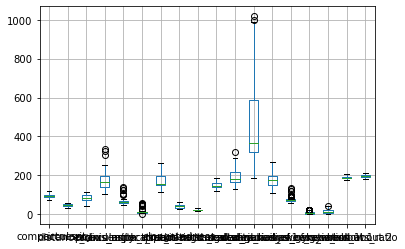

In [9]:
vehicles_new.boxplot()

In [10]:
# Fetch Outliers & Observe the outlier summary statistics
outlier_indexes = mm.find_outliers_indexes(vehicles_new)

Data Statistics with Whiskers:
                             count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.829196    6.141147   33.0   40.00   
distance_circularity         846.0   82.103428   15.750522   40.0   70.00   
radius_ratio                 846.0  168.859338   33.520130  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.675532    7.883184   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.906028   33.195419  112.0  147.00   
elongatedness                846.0   40.939716    7.813501   26.0   33.00   
pr.axis_rectangularity       846.0   20.591608    2.593038   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.653073   31.373215  130.0  167.00   
scaled_variance.1            846.0  439.65602

In [11]:
# Drop the outliers
vehicles_new1 = vehicles_new.drop(outlier_indexes)
vehicles_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [13]:
### Lets try PCA method to reduce the variables

In [14]:
# Standardize the Features
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

X = vehicles_new1.drop('class',axis=1)
Y = vehicles_new1['class']
X_std = pd.DataFrame(std_scale.fit_transform(X, Y), columns=X.columns, index=X.index)

In [24]:
covar = X_std.cov()
covar

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.001232,0.676143,0.786129,0.743847,0.200616,0.498273,0.811277,-0.789570,0.811073,0.674997,0.794888,0.816761,0.577985,-0.254403,0.199197,0.165609,0.295662,0.364609
circularity,0.676143,1.001232,0.785458,0.637834,0.206599,0.565709,0.839402,-0.813275,0.837804,0.959479,0.797734,0.829972,0.922360,0.067775,0.138656,-0.012902,-0.116134,0.038741
distance_circularity,0.786129,0.785458,1.001232,0.806584,0.245386,0.669743,0.904227,-0.908017,0.892833,0.768562,0.885258,0.889412,0.702215,-0.238598,0.099129,0.267370,0.128710,0.321303
radius_ratio,0.743847,0.637834,0.806584,1.001232,0.660792,0.461548,0.789448,-0.842920,0.760636,0.577034,0.794878,0.778424,0.552249,-0.398539,0.035054,0.191548,0.412940,0.499539
pr.axis_aspect_ratio,0.200616,0.206599,0.245386,0.660792,1.001232,0.139382,0.199906,-0.301875,0.166966,0.146025,0.215890,0.185627,0.153227,-0.325474,-0.052039,-0.026660,0.406423,0.419895
max.length_aspect_ratio,0.498273,0.565709,0.669743,0.461548,0.139382,1.001232,0.497512,-0.503146,0.499122,0.648642,0.413239,0.459984,0.404529,-0.332586,0.084677,0.143222,0.057595,0.394934
scatter_ratio,0.811277,0.839402,0.904227,0.789448,0.199906,0.497512,1.001232,-0.972202,0.988618,0.807038,0.979655,0.994147,0.794852,0.001483,0.063488,0.218532,-0.002267,0.115800
elongatedness,-0.789570,-0.813275,-0.908017,-0.842920,-0.301875,-0.503146,-0.972202,1.001232,-0.949654,-0.771371,-0.967371,-0.957989,-0.763316,0.088083,-0.044361,-0.186907,-0.106917,-0.211605
pr.axis_rectangularity,0.811073,0.837804,0.892833,0.760636,0.166966,0.499122,0.988618,-0.949654,1.001232,0.812754,0.965191,0.987963,0.793610,0.017560,0.068761,0.218414,-0.025617,0.097945
max.length_rectangularity,0.674997,0.959479,0.768562,0.577034,0.146025,0.648642,0.807038,-0.771371,0.812754,1.001232,0.752273,0.796284,0.867905,0.053478,0.132979,0.001187,-0.115822,0.067260


Eigen Pairs in Sorted Order = 
[(9.78480767389425, array([ 0.27234603,  0.28442078,  0.30129374,  0.27225007,  0.09832424,
        0.1950967 ,  0.31038713, -0.30850305,  0.30736701,  0.2765014 ,
        0.30323397,  0.3075398 ,  0.26157726, -0.0436677 ,  0.03629218,
        0.06007429,  0.03503061,  0.08275247])), (3.3708531327574036, array([-0.08987218,  0.13319605, -0.04414559, -0.20154301, -0.25893832,
       -0.09496686,  0.07205073, -0.01137955,  0.08456407,  0.12589599,
        0.06966196,  0.0766626 ,  0.21054989,  0.50473362, -0.01404506,
       -0.09377035, -0.50137944, -0.50698642])), (1.201705977870814, array([ 0.01940256,  0.21568861, -0.07024322, -0.04329795,  0.11857912,
        0.14429641, -0.11459788,  0.09001271, -0.11179333,  0.22190564,
       -0.14539849, -0.11366436,  0.21414468, -0.06817784,  0.51312787,
       -0.68908958,  0.06292497,  0.04201391])), (1.1389561099831136, array([ 0.1307779 , -0.02149465,  0.10653551, -0.25178064, -0.599498  ,
        0.31555818, 

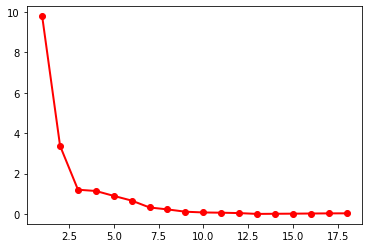

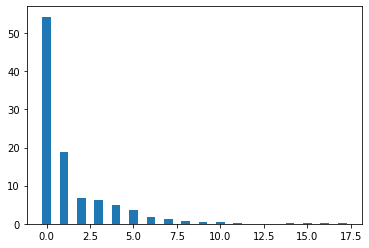

Number of Features =  4


In [23]:
# Calculate Eigen Values to find the number of derived features we need to focus on
numfeatures = mm.get_num_pca_features(X_std)
print("Number of Features = ", numfeatures)

In [26]:
# Generate New features
eig_vals, eig_vecs = np.linalg.eig(covar)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)
# Print
print(eig_pairs[0][1]) 
print(eig_pairs[1][1])


[ 0.27234603  0.28442078  0.30129374  0.27225007  0.09832424  0.1950967
  0.31038713 -0.30850305  0.30736701  0.2765014   0.30323397  0.3075398
  0.26157726 -0.0436677   0.03629218  0.06007429  0.03503061  0.08275247]
[-0.08987218  0.13319605 -0.04414559 -0.20154301 -0.25893832 -0.09496686
  0.07205073 -0.01137955  0.08456407  0.12589599  0.06966196  0.0766626
  0.21054989  0.50473362 -0.01404506 -0.09377035 -0.50137944 -0.50698642]


In [27]:
# Generate W Matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(18,1), eig_pairs[1][1].reshape(18,1), 
                      eig_pairs[2][1].reshape(18,1), eig_pairs[3][1].reshape(18,1)))
matrix_w                      

array([[ 0.27234603, -0.08987218,  0.01940256,  0.1307779 ],
       [ 0.28442078,  0.13319605,  0.21568861, -0.02149465],
       [ 0.30129374, -0.04414559, -0.07024322,  0.10653551],
       [ 0.27225007, -0.20154301, -0.04329795, -0.25178064],
       [ 0.09832424, -0.25893832,  0.11857912, -0.599498  ],
       [ 0.1950967 , -0.09496686,  0.14429641,  0.31555818],
       [ 0.31038713,  0.07205073, -0.11459788, -0.00983917],
       [-0.30850305, -0.01137955,  0.09001271,  0.08000725],
       [ 0.30736701,  0.08456407, -0.11179333,  0.01605405],
       [ 0.2765014 ,  0.12589599,  0.22190564,  0.06417419],
       [ 0.30323397,  0.06966196, -0.14539849, -0.06940589],
       [ 0.3075398 ,  0.0766626 , -0.11366436, -0.01545829],
       [ 0.26157726,  0.21054989,  0.21414468, -0.07212822],
       [-0.0436677 ,  0.50473362, -0.06817784, -0.13381048],
       [ 0.03629218, -0.01404506,  0.51312787,  0.50332435],
       [ 0.06007429, -0.09377035, -0.68908958,  0.38064686],
       [ 0.03503061, -0.

In [29]:
# Generate New Feature Space
newfeatures = X_std.dot(matrix_w)
newfeatures

,0,1,2,3
0,0.587288,-0.655433,0.582639,-0.659740
1,-1.525604,-0.330873,0.248925,1.291988
2,3.962371,0.241175,1.222557,0.201547
3,-1.551674,-3.039162,0.474894,0.383300
5,5.441863,4.634684,-1.322067,0.030372
...,...,...,...,...
841,-0.369489,-0.642469,-1.486691,0.172237
842,-0.042314,-0.163428,-0.444979,-0.202442
843,5.180511,-0.171371,0.610472,-0.903022
844,-3.319795,-1.097057,-1.923963,0.321492


In [31]:
corr = newfeatures.corr()
corr

,0,1,2,3
0,1.000000e+00,1.635078e-16,3.955402e-17,-1.469935e-16
1,1.635078e-16,1.000000e+00,2.619523e-16,-4.567971e-16
2,3.955402e-17,2.619523e-16,1.000000e+00,-1.291292e-15
3,-1.469935e-16,-4.567971e-16,-1.291292e-15,1.000000e+00


<AxesSubplot:>

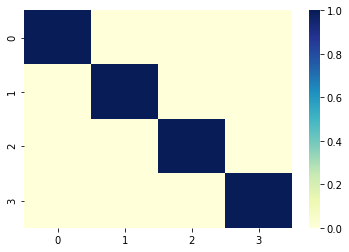

In [32]:
sns.heatmap(abs(corr), cmap="YlGnBu", vmax=1,vmin=0)

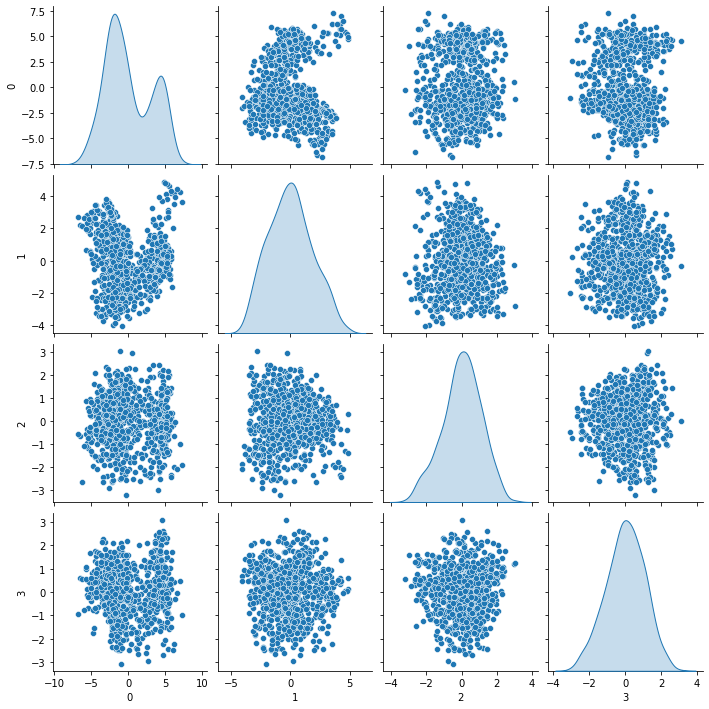

In [34]:
sns.pairplot(newfeatures,diag_kind='kde')

In [35]:
# Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

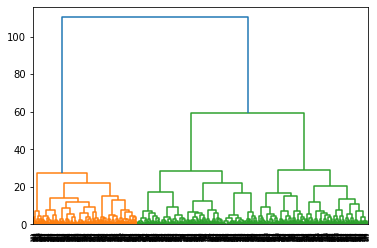

In [36]:
dendrogram = sch.dendrogram(sch.linkage(newfeatures, method = 'ward'))

In [37]:
Y.value_counts()

car    416
bus    208
van    189
Name: class, dtype: int64

In [42]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [50]:
Y_cluster = cluster.fit_predict(newfeatures)
Y_cluster

array([0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 1,
       1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 2,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0,
       1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 0,
       2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1,
       0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1,
       0, 0, 1, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2,

In [51]:
cluster1 = newfeatures[Y_cluster == 0]
cluster2 = newfeatures[Y_cluster == 1]
cluster3 = newfeatures[Y_cluster == 2]

In [57]:
cluster1.shape, cluster2.shape, cluster3.shape

((267, 4), (253, 4), (293, 4))

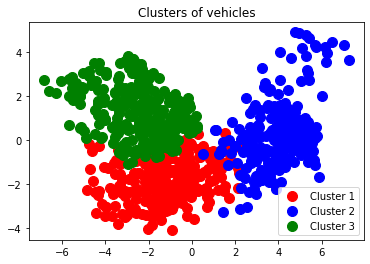

In [59]:
# Visualising the clusters
plt.scatter(cluster1[0], cluster1[1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster2[0], cluster2[1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(cluster3[0], cluster3[1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of vehicles')
plt.legend()
plt.show()

### Try with Python PCA Model

In [60]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=numfeatures, random_state=10).fit(X_std)
print(pcamodel)

PCA(n_components=4, random_state=10)


In [61]:
print(pcamodel.components_)

[[ 0.27234603  0.28442078  0.30129374  0.27225007  0.09832424  0.1950967
   0.31038713 -0.30850305  0.30736701  0.2765014   0.30323397  0.3075398
   0.26157726 -0.0436677   0.03629218  0.06007429  0.03503061  0.08275247]
 [-0.08987218  0.13319605 -0.04414559 -0.20154301 -0.25893832 -0.09496686
   0.07205073 -0.01137955  0.08456407  0.12589599  0.06966196  0.0766626
   0.21054989  0.50473362 -0.01404506 -0.09377035 -0.50137944 -0.50698642]
 [-0.01940256 -0.21568861  0.07024322  0.04329795 -0.11857912 -0.14429641
   0.11459788 -0.09001271  0.11179333 -0.22190564  0.14539849  0.11366436
  -0.21414468  0.06817784 -0.51312787  0.68908958 -0.06292497 -0.04201391]
 [ 0.1307779  -0.02149465  0.10653551 -0.25178064 -0.599498    0.31555818
  -0.00983917  0.08000725  0.01605405  0.06417419 -0.06940589 -0.01545829
  -0.07212822 -0.13381048  0.50332435  0.38064686 -0.03606116  0.1007535 ]]


In [62]:
# Use Absolute values, so its simple to interpret
df_factors = pd.DataFrame(abs(pcamodel.components_),columns=X.columns.values)
df_factors.transpose()

,0,1,2,3
compactness,0.272346,0.089872,0.019403,0.130778
circularity,0.284421,0.133196,0.215689,0.021495
distance_circularity,0.301294,0.044146,0.070243,0.106536
radius_ratio,0.272250,0.201543,0.043298,0.251781
pr.axis_aspect_ratio,0.098324,0.258938,0.118579,0.599498
max.length_aspect_ratio,0.195097,0.094967,0.144296,0.315558
scatter_ratio,0.310387,0.072051,0.114598,0.009839
elongatedness,0.308503,0.011380,0.090013,0.080007
pr.axis_rectangularity,0.307367,0.084564,0.111793,0.016054
max.length_rectangularity,0.276501,0.125896,0.221906,0.064174


<AxesSubplot:>

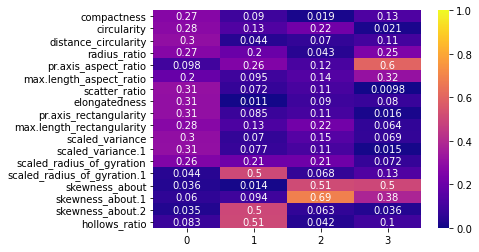

In [63]:
sns.heatmap(df_factors.transpose(),cmap='plasma', annot=True, vmin=0,vmax=1)

In [64]:
X_trans = pd.DataFrame(pcamodel.fit_transform(X_std), columns=['dv1','dv2','dv3','dv4'])
X_trans.sample(5)

,dv1,dv2,dv3,dv4
641,0.731214,-1.320192,-1.298482,1.152402
205,-2.093431,1.052880,-0.582481,-1.160934
68,0.195460,-1.546758,1.776946,-0.045751
411,2.618256,0.248221,0.757237,-2.943056
221,-0.412287,1.713261,-0.031978,0.699587


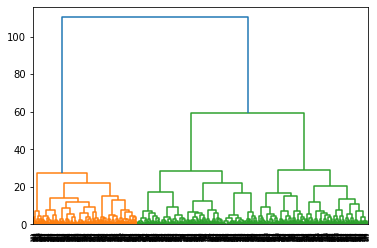

In [66]:
dendrogram = sch.dendrogram(sch.linkage(X_trans, method = 'ward'))

In [67]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
Y_cluster = cluster.fit_predict(X_trans)
cluster1 = X_trans[Y_cluster == 0]
cluster2 = X_trans[Y_cluster == 1]
cluster3 = X_trans[Y_cluster == 2]
cluster1.shape, cluster2.shape, cluster3.shape

((267, 4), (253, 4), (293, 4))

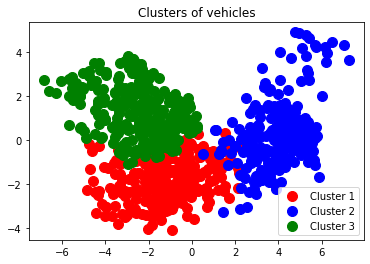

In [69]:
# Visualising the clusters
plt.scatter(cluster1['dv1'], cluster1['dv2'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster2['dv1'], cluster2['dv2'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(cluster3['dv1'], cluster3['dv2'], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of vehicles')
plt.legend()
plt.show()

## References
1. [https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a](https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a)